# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [ ]:
import os
if not os.path.exists("Daten"):
    os.makedirs("Daten") 
elif os.path.exists("Daten"):
    print("Ordner ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Füge hier alle benötigten Libaries ein:

In [ ]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

In [4]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [2]:
df = pd.read_csv("Daten/wage.csv", sep=';')

#### Begutachte deine Daten:

In [3]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [4]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  4


Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [ ]:
df.describe().round(2)

Solltest du im folgenden mehrere NaN values haben, wähle eine der folgenden Optionen:
1. Lösche die Zeilen mit NaN values
2. Fülle die NaN values mit einem Wert deiner Wahl
3. Fülle die NaN values mit dem Durchschnittswert der Spalte (mean, mode, median)

In [ ]:
df.isnull().sum()

In [11]:
# Lösche die Zeilen mit NaN values 
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl
#df = df.fillna()

# Fülle die NaN values mit dem Durchschnittswert der Spalte
#df = df.fillna(df.mean()) #<- mean(), mode(), median()

weitere Informationen findest du im Leitfaden
Daten filterung:

1. Filterung nach einer Kondition:

`df_filtered = df[df["wage"] > 12.00]`

2. Filterung mit mehreren Kondition 

`df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12)]`


In [ ]:
df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12) & (df["metro"] == 0)] # Beachte das du nun deine Spalten namen hinzufügen musst
df_filtered_educ

## Histogramm
---

In [ ]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")

### Korrelations Matrix
---

In [ ]:
sns.heatmap(df.corr(), annot=True)

## Scatterplot
---

In [ ]:
sns.scatterplot(data=df, x="exper", y="wage", alpha=0.5)
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")

## Balkendiagramm
---

In [ ]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Barplot von Metro und Lohn")

## Regressions Analyse

In [7]:
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [8]:
X = df[["educ", "exper", "metro"]]
y = df["wage"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.8,  random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [10]:
# X_train_const = sm.add_constant(X_train)
# X_test_const = sm.add_constant(X_test)

model_stats = sm.OLS(y, X)
model = model_stats.fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              1205.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        17:05:54   Log-Likelihood:                         -3129.4
No. Observations:                 998   AIC:                                      6265.
Df Residuals:                     995   BIC:                                      6280.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Residuale 
---

<Axes: ylabel='Count'>

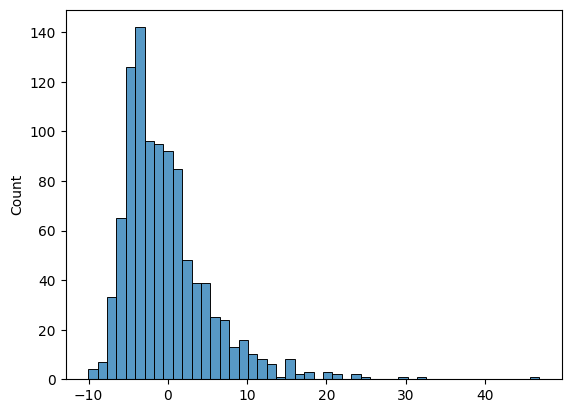

In [12]:
model_residuals = model.resid
sns.histplot(model_residuals)

## Vorhersagen treffen
---

In [ ]:
y_pred = model.predict(X_test_const)
y_pred[:5] # Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]

## Simple Lineare Regression aufbauen
---

In [ ]:
sns.regplot(data = df, x="educ", y ="wage")

In [ ]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

In [ ]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

### Anova

In [13]:
from scipy.stats import f_oneway

In [14]:
df.columns

wage = df['wage']
educ = df['educ']
exper = df['exper']
metro = df['metro']

In [15]:
f_oneway(wage,educ,exper,metro)

F_onewayResult(statistic=np.float64(1306.9793462926605), pvalue=np.float64(0.0))

## Heteroskedasticity

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [32]:
statecrime_df = sm.datasets.statecrime.load_pandas().data
f ='violent~hs_grad+poverty+single+urban'
statecrime_model = ols(formula=f, data=statecrime_df).fit()

In [ ]:
white_test = het_white(statecrime_model.resid,  statecrime_model.model.exog)
white_test

In [ ]:
X_test_const.values

In [ ]:
statecrime_model.resid

In [ ]:
model

In [18]:
model.resid

0      -6.772891
1      -8.756864
2      -9.890829
3      -7.397803
4      -6.195864
         ...    
993    21.449446
994    25.353515
995    29.542948
996    32.377747
997    46.814826
Length: 998, dtype: float64

In [22]:
model

In [20]:
bp_test = het_breuschpagan(model.resid, X)
bp_test

ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

In [19]:
print(len(model.resid))
print(X.shape)

998
(998, 3)


In [25]:
print(X.isnull().sum())
print(model.resid.isnull().sum())

educ     0
exper    0
metro    0
dtype: int64
0
